In [ ]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print('Training images: {}'.format(X_train.shape))
print('Testing images: {}'.format(X_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)#should be and is 32x32x3

(32, 32, 3)


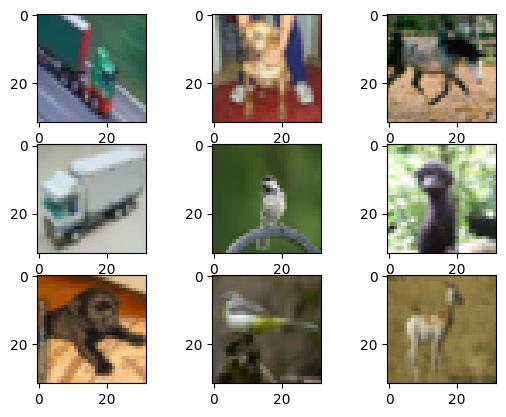

In [ ]:
#create a grid of 3x3 images(9 images of 3x3 subplots)
for i in range(0,9):
    plt.subplot(330+1+i)#denotes 3x3 and postion
    img=X_train[i+50]#no need to transpose else transpose([1,2,0])
    plt.imshow(img)

plt.show()

In [ ]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
seed=6
np.random.seed(seed)

#again load the dataset as we set the random seed and not apllying any shuffling effects or random effects
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255(RGB) to 0.0-1.0
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [ ]:
print(y_train.shape)
print(y_train[0])
print(y_train.min())
print(y_train.max())
#0 to 9

(50000, 1)
[6]
0
9


In [ ]:
#hot encode outputs
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
#conv2d is the main convulational layer
from keras.optimizers import SGD#stochastic gradient descent

In [ ]:
def allcnn(weights=None):
    #taking random weights ny default else usr passed pretrained weights

    model=Sequential()#we will be adding one layer after another

    #not the input layer but need to tell the conv. layer to accept input
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))#32x32x3 channels
    model.add(Activation('relu'))#required for each conv. layer
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))#drop neurons randomly;helps the network generalize(prevent overfitting on training data) better so instead of having individual neurons
    #that are controlling specific classes/features, the features are spread out over the entire network

    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

    #load the weights,if passed
    if weights:
        model.load_weights(weights)

    #return model
    return model

In [ ]:
#define the hyper parameters(generic or do Grid Search)
learning_rate=0.01
weight_decay=1e-6
momentum=0.9

#define training parameters
epochs=350 #from research paper
batch_size=32#run 32 images times then update the parameters instead of updating them after every image

model=allcnn()

#define optimizer and compile model
sgd = SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

print(model.summary())#1.3m parameters and all are trainable

# #fit the model(update the parameters and loss)
# model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=batch_size,verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 192)         │         166,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 192)         │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 192)           │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 192)           │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 192)           │          37,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 10)            │           1,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 10)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,369,738 (5.23 MB)

 Trainable params: 1,369,738 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9
#no need for training parameters

# define weights and build model
weights='all_cnn_weights_0.9088_0.4994.hdf5'#KERAS format hdf5
#pretrained weights  that have already gone through the above press
weights='all_cnn_weights_0.9088_0.4994.hdf5'


# define optimizer and compile model
sgd = SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#measure of model's perfrmane is accuracy

# print model summary
print (model.summary())

# test the model with pretrained weights
scores=model.evaluate(X_test,Y_test,verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 192)         │         166,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 192)         │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 192)           │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 192)           │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 192)           │          37,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 10)            │           1,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 10)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,369,738 (5.23 MB)

 Trainable params: 1,369,738 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

None
313/313 ━━━━━━━━━━━━━━━━━━━━ 104s 329ms/step - accuracy: 0.0988 - loss: 2.3027
Accuracy: 10.00%


In [ ]:
classes=range(0,10)#10 not included

names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# zip the names and classes to make a dictionary of class_labels
class_labels=dict(zip(classes,names))
print(class_labels)
# generate batch of 9 images to predict
batch=X_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)

#make predictions
predictions=model.predict(batch,verbose=1)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


In [ ]:

print(predictions)
print(predictions.shape)

[[0.09998284 0.09916873 0.1009714  0.09906454 0.10011705 0.10018845
  0.09975743 0.10125998 0.09960151 0.09988812]
 [0.09997566 0.0989989  0.10110702 0.09900247 0.10006832 0.10020523
  0.09980107 0.10140673 0.09959793 0.09983673]
 [0.09999228 0.09945273 0.10058479 0.09953718 0.10012039 0.10008976
  0.0997273  0.10082941 0.09986357 0.0998026 ]
 [0.09999743 0.09938046 0.10083766 0.09942341 0.1001266  0.09999223
  0.09959582 0.10115441 0.09976551 0.09972645]
 [0.09996725 0.09912068 0.10095002 0.0990645  0.10015043 0.10022298
  0.09987782 0.10115775 0.09971698 0.09977152]
 [0.09995711 0.09866093 0.10138471 0.09864178 0.10010475 0.10026696
  0.09984368 0.10193068 0.09969088 0.09951845]
 [0.09993178 0.0993018  0.10083516 0.09927034 0.10011539 0.10012475
  0.09979773 0.10110039 0.09970284 0.09981965]
 [0.10006419 0.09949207 0.10058431 0.09945863 0.10001905 0.10002429
  0.09985284 0.10078676 0.09980419 0.09991372]
 [0.09993939 0.09901283 0.10109069 0.09905789 0.10015338 0.10018218
  0.099734  

In [ ]:
#these are individual class probabilities, should sum to 1.0
for image in predictions:
    print(np.sum(image))

#shows that there is hundred percent probability that images to belong to one of the classes

1.0
1.0
1.0
1.0
0.9999999
0.9999999
0.9999998
1.0
1.0


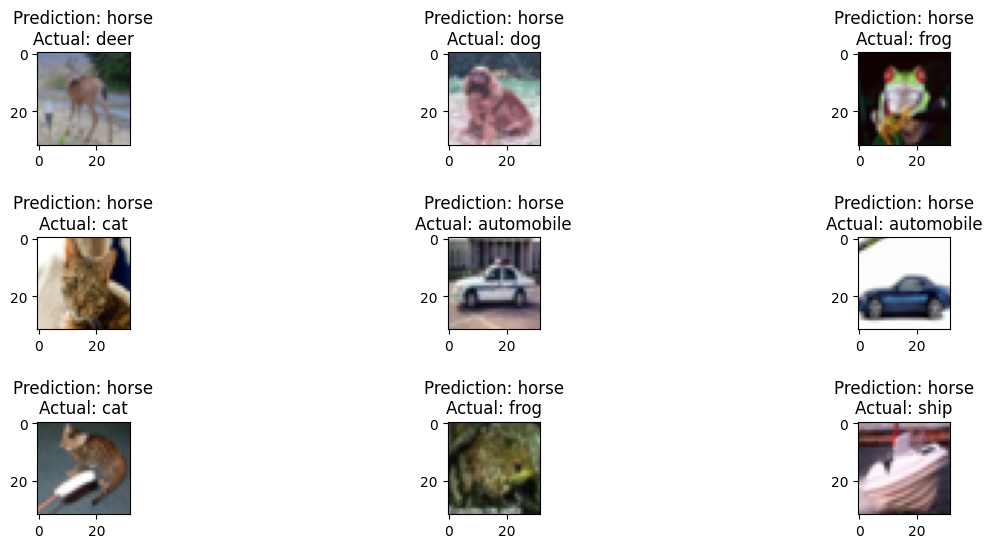

In [ ]:
#create a grid of 3x3 images
fig,axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
class_result = np.argmax(predictions, axis=-1)
for i,img in enumerate (batch):
        # determine label for each prediction, set title
        for key,value in class_labels.items():
            if class_result[i]==key:
                title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
                axs[i].set_title(title)
                axs[i].axes.get_xaxis().set_visible(True)
                axs[i].axes.get_yaxis().set_visible(True)

        # plot the image
        axs[i].imshow(img)

# show the plot
plt.show()